# EXPLAINABLE AI: SHAP ALGORITHM

### Importing Libraries Required

In [1]:
!pip install shap
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import numpy as np
import pandas as pd
np.random.seed(123)

import shap

import warnings
warnings.filterwarnings ('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.9 MB/s eta 0:00:00


### Importing Data

In [2]:
# Loading the data to work with
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Training XGBoost

In [4]:
# Setting up the data for modelling

y=df['target'].to_frame() # define Y
X=df[df.columns.difference(['target'])] # define X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
    TRAIN TEST SPLIT BELOW:
    X_train, X_test, y_train, y_test
"""

#********************#




' \n    TRAIN TEST SPLIT BELOW:\n    X_train, X_test, y_train, y_test\n'

In [ ]:
# Building model - Xgboost

model = XGBClassifier(random_state=42)

"""
    Train your model below using "model" as your XGBoost model variable name
"""

#********************#



# Train XGBoost model with training data
model.fit(X_train, y_train)

#********************#

In [6]:
# Making prediction with test data
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]


In [7]:
# Performance Measurement
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.61%


### Shap explainer

In [12]:
# Write a lime explainer code here:

explainer=shap.TreeExplainer(model)

"""
    Explainer code here ->
    - make a tree explainer for the model
    - Use "explainer" as variable name for explainer object
"""

#********************#

' \n    Explainer code here -> \n    - make a tree explainer for the model\n    - Use "explainer" as variable name for explainer object\n'

### Storing Shap expected value

In [21]:
# Store shap expected values and shap values

shap_values=explainer.shap_values(X)
expected_values=explainer.expected_value


"""
    Shap values in "shap_value" variable
    Expected shap values in "expected_value" variable
"""

#********************#

'\n    Shap values in "shap_value" variable\n    Expected shap values in "expected_value" variable\n'

### Explaining XGBoost AI using Shap explainer

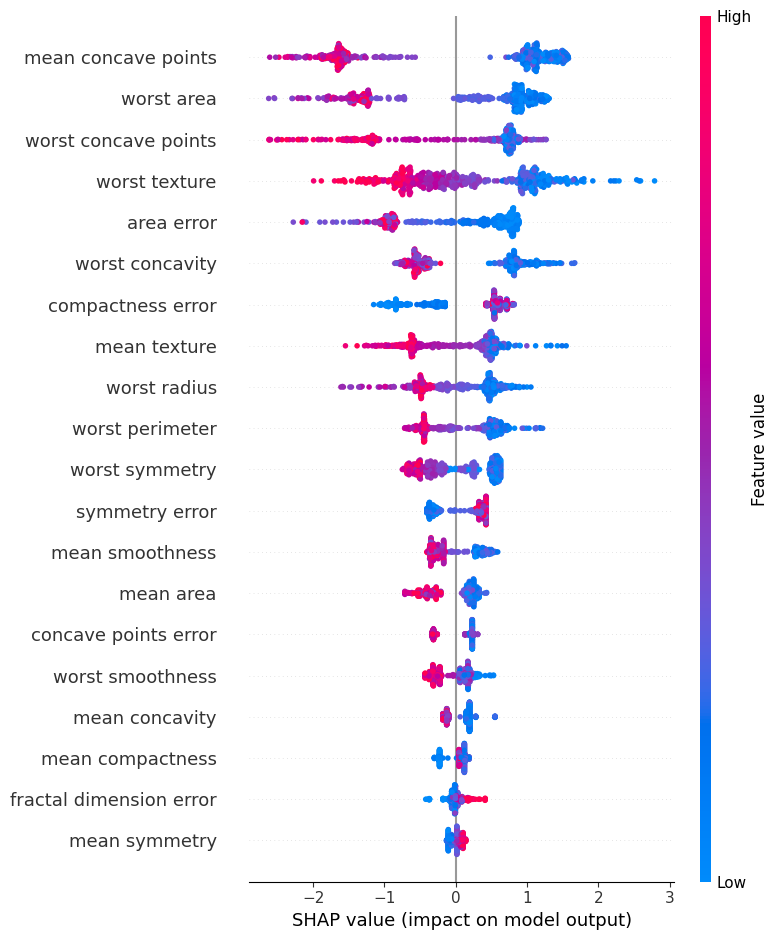

In [15]:
# Make a feature vs its impact on model char
shap.summary_plot(shap_values, X)

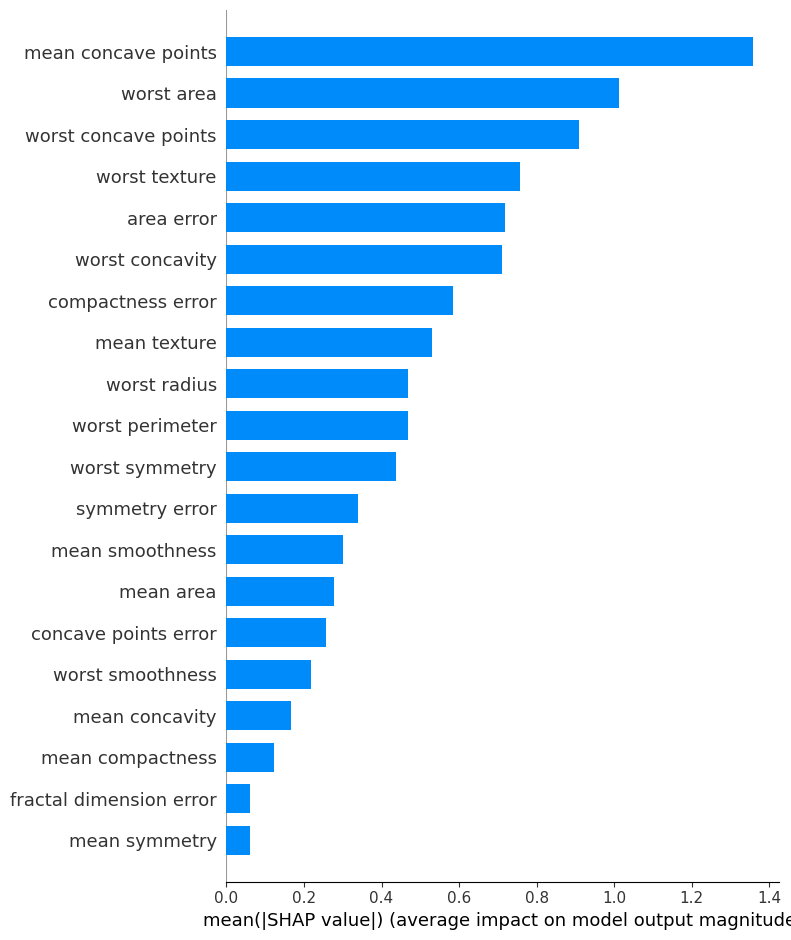

In [16]:
# Make a bar graph plot
shap.summary_plot(shap_values, X, plot_type='bar')